In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [6]:
# Some basic functions to improve letter readibility

def get_grayscale(image):
    """Convert an image from RBG to grayscale
    
    :param image: the image to convert to grayscale.

    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
def thresholding(image, inverted = False):
    """Apply thresholding to an image

    :param image: the image to apply thresholding to.
    :param inverted: whether to apply inversion

    """
    if inverted:
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    else: 
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def dilate(image, kernel_x = 2, kernel_y = 2, iterations = 1):
    """Dilate an image

    :param image: the image to apply dilation to.
    :param kernel_x: the width of the kernel matrix
    :param kernel_y: the height of the kernel matrix
    :param iterations: the number of times to apply dilation

    Equal to erosion, if inverted thresholding was applied.
    """
    kernel = np.ones((kernel_x, kernel_y),np.uint8)
    return cv2.dilate(image, kernel, iterations = iterations)
    
#erosion
def erode(image, kernel_x = 2, kernel_y = 2, iterations = 1):
    """Erode an image to thicken lines.

    :param image: the image to apply erosion to.
    :param kernel_x: the width of the kernel matrix
    :param kernel_y: the height of the kernel matrix
    :param iterations: the number of times to apply erosion

    Equal to dilation, if normal thresholding was applied.
    """
    kernel = np.ones((kernel_x, kernel_y),np.uint8)
    return cv2.erode(image, kernel, iterations = iterations)
    
def improve_quality(image, inverted = False):
    """Combine all the methods to generate a better image
    
    :param image: the image to improve the quality of.
    :param inverted: whether to apply inverted thresholding.
    
    """

    image = get_grayscale(image)

    if inverted:
        image = thresholding(image, True)
        image = dilate(image, 2, 2, 1)
    else:
        image = thresholding(image)
        image = erode(image, 2, 2, 1)

    return image

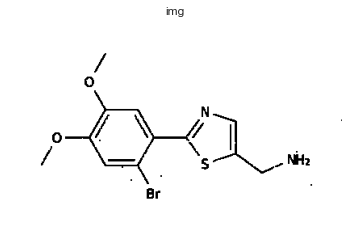

In [7]:
img = cv2.imread("input/train/0/0/0/000ab87284f6.png")

img = improve_quality(img)

plt.subplot(1, 1, 1),plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title('img')
plt.xticks([]),plt.yticks([])
plt.show()